<a href="https://colab.research.google.com/github/Brunojp178/PI/blob/Semana2/PI_Tarefas_da_Segunda_Semana_(ERE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.
4. Envie um áudio curto ao professor explicando cada solução criada por você.

# 1. Extração de Região de Interesse (ROI)

Dessa vez você vai criar uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

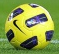

In [14]:
from google.colab import files
uploaded = files.upload()

Saving landscape.jpg to landscape.jpg


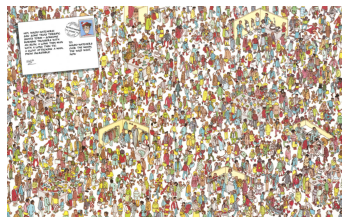

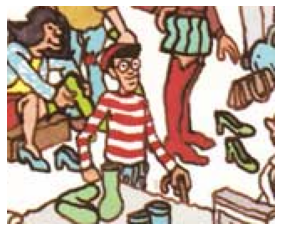

In [ ]:
#Insira seu código abaixo!
import numpy as np
import cv2
from matplotlib import pyplot as plt

def main():
  # imgUpload()

  image = imgLoad("waldo.jpg")
  imgShow(image, False)

  waldo = image[270:400, 1110:1270]
  imgShow(waldo, False)

def imgUpload():
  from google.colab import files
  uploaded = files.upload()

def imgLoad(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def imgShow(img, axis):
  imgplot = plt.imshow(img)
  if not axis: plt.axis('off')
  plt.show()


main()

# 2. Colar Imagem

Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

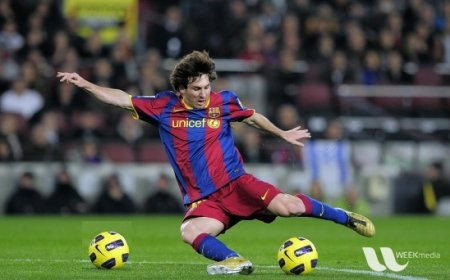

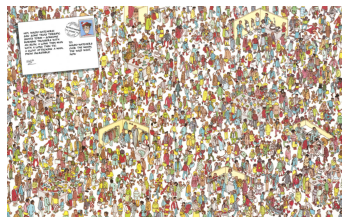

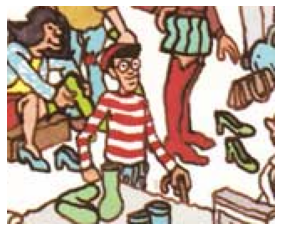

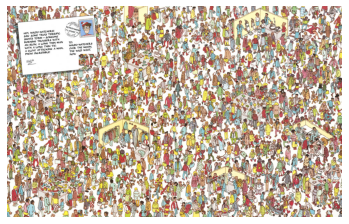

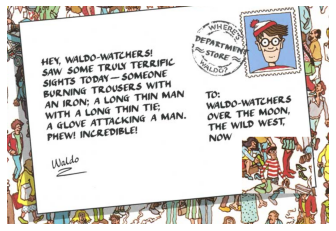

In [ ]:
#Insira seu código abaixo!

import numpy as np
import cv2
from matplotlib import pyplot as plt

def main():
  # imgUpload()

  image = imgLoad("waldo.jpg")
  imgShow(image, False)

  waldo = image[270:400, 1110:1270]
  imgShow(waldo, False)

  newImage = imgPaste(waldo, image, 400, 530, 600, 760)

  imgShow(newImage, False)
  # zooooommmmm
  newImage = newImage[100:600, 60:800]
  imgShow(newImage, False)

def imgUpload():
  from google.colab import files
  uploaded = files.upload()

def imgLoad(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def imgPaste(img, imgDty, y, y2, x, x2):
  imgDty[y:y2, x:x2] = img
  return imgDty

def imgShow(img, axis):
  imgplot = plt.imshow(img)
  if not axis: plt.axis('off')
  plt.show()


main()

# 3. Trabalhando com Canais de Cores

Dessa vez, você deverá criar um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

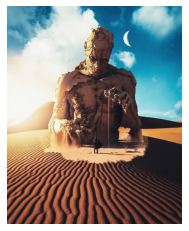

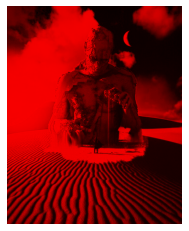

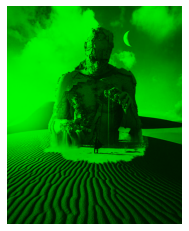

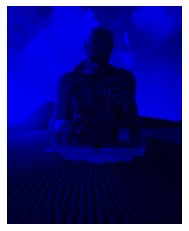

vermelho: 41.251987743882275 
Verde: 40.72574663111772 
Azul: 39.016165984623015 
Maior: 41.251987743882275

A imagem é mais vermelha!


In [18]:
#Insira seu código abaixo!
import numpy as np
import cv2
from matplotlib import pyplot as plt

def main():
  # imgUpload()
  image = imgLoad("sandman.jpg")
  imgShow(image, False)

  # Get the img channels from the image.
  r_channel = image[:,:,0]
  g_channel = image[:,:,1]
  b_channel = image[:,:,2]

  # Create empty images from the shape of the original one
  r_img = np.zeros(image.shape)
  g_img = np.zeros(image.shape)
  b_img = np.zeros(image.shape)

  # Load the channels on the empty images
  r_img[:,:,0] = r_channel
  g_img[:,:,1] = g_channel
  b_img[:,:,2] = b_channel


  imgShow(r_img,False)
  imgShow(g_img,False)
  imgShow(b_img,False)

  r_px = avgColor(r_img, 0)
  g_px = avgColor(g_img, 1)
  b_px = avgColor(b_img, 2)

  max_v = max(r_px, g_px, b_px)

  print("vermelho:", r_px, "\nVerde:", g_px, "\nAzul:", b_px, "\nMaior:", max_v)

  if max_v == r_px : print("\nA imagem é mais vermelha!")
  if max_v == g_px : print("\nA imagem é mais verde!")
  if max_v == b_px : print("\nA imagem é mais azul!")
  

def imgUpload():
  from google.colab import files
  uploaded = files.upload()

def imgLoad(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def imgShow(img, axis):
  imgplot = plt.imshow(img.astype('uint8'))
  if not axis: plt.axis('off')
  plt.show()

def avgColor(img, cor):
  total_px = img.size
  count_px = 0
  altura, largura, canais_cor = img.shape

  for y in range(0, altura):
    for x in range(0, largura):
      count_px = count_px + img.item(y, x,cor)

  return count_px/total_px

main()

# 4. Criando o ouriço brasileiro

Existe um jogo na Internet chamado "Brasonic", que consiste numa versão tupiniquim do ouriço mais popular dos jogos, Sonic. Basicamente, ele é uma versão do personagem trocando suas cores pelo verde e amarelo da bandeira nacional.

Nesse exercício, você deverá fazer um algoritmo que "recebe" uma imagem do Sonic e "troca" suas cores para o verde e amarelo. Para tal, modifique os pixels e salve a nova imagem em disco!

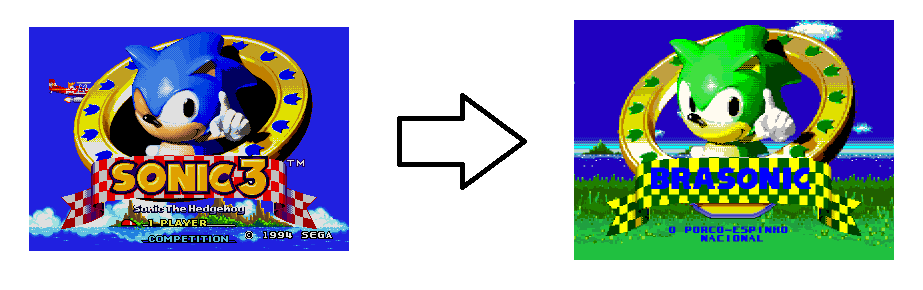

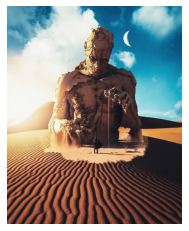

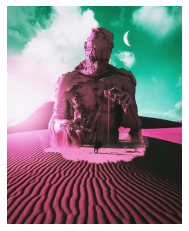

In [33]:
#Insira seu código abaixo
import numpy as np
import cv2
from matplotlib import pyplot as plt

def main():
  # imgUpload()
  image = imgLoad("sandman.jpg")
  imgShow(image, False)

  imgShow(changeColor(image, 2, 1), False)

def imgUpload():
  from google.colab import files
  uploaded = files.upload()

def imgLoad(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def imgShow(img, axis):
  imgplot = plt.imshow(img.astype('uint8'))
  if not axis: plt.axis('off')
  plt.show()

def changeColor(img, color_input, color_output):
  
  altura, largura, canais_cor = img.shape

  for y in range(0, altura):
    for x in range(0, largura):
      input = img.item(y, x, color_input)
      output = img.item(y, x, color_output)

      img.itemset((y, x, color_input), output)
      img.itemset((y, x, color_output), input)

  return img

main()


# 5. Junte pessoas usando Alpha Blending

No vídeo abaixo (um pouco mais antigo) eu fiz uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. Eu fiz isso usando a técnica de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

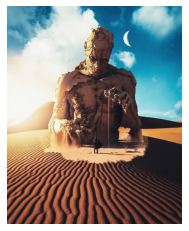

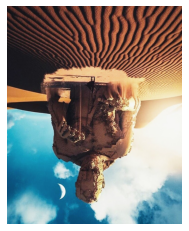

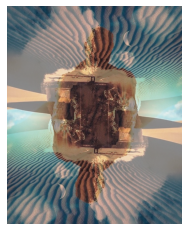

In [36]:
#Insira seu código abaixo
import numpy as np
import cv2
from matplotlib import pyplot as plt

def main():
  # imgUpload()
  image = imgLoad("sandman.jpg")
  imgShow(image, False)

  img_rotate = cv2.rotate(image, cv2.ROTATE_180)

  imgShow(img_rotate, False)

  blend = cv2.addWeighted(image,0.5,img_rotate,0.5,0)
  imgShow(blend, False)

def imgUpload():
  from google.colab import files
  uploaded = files.upload()

def imgLoad(name):
  image = cv2.imread(name)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def imgShow(img, axis):
  imgplot = plt.imshow(img.astype('uint8'))
  if not axis: plt.axis('off')
  plt.show()

main()